# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import gc
import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_profile, plot_profile_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
competitors = ["ClaSS", "FLOSS", "Window"] # "BOCD", 
datasets = ["PAMAP", "mHealth", "WESAD", "MIT-BIH-VE", "MIT-BIH-Arr", "SleepDB"] # 
methods, dfs = list(), list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))


for idx, (name, file_name) in enumerate(tqdm(methods)):
    df = []
    
    for d in datasets:
        df.append(pd.read_csv(f"../../experiments/competitor_{d}/{file_name}", usecols=["dataset", eval_score], compression="gzip"))
            
    df = pd.concat(df)    
    df.sort_values(by="dataset", inplace=True)
    dfs.append((name, df))
    
    gc.collect()
        
df_scores = pd.DataFrame()

for name, df in dfs:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores.reset_index(drop=True, inplace=True)
df_scores

100%|████████████████████████████████████████████| 3/3 [05:32<00:00, 110.81s/it]


,dataset,ClaSS,FLOSS,Window
0,MIT-BIH-Arr_MLII_Subject100,0.659,0.500,1.000
1,MIT-BIH-Arr_MLII_Subject101,0.516,0.234,1.000
2,MIT-BIH-Arr_MLII_Subject103,0.329,0.291,1.000
3,MIT-BIH-Arr_MLII_Subject105,0.306,0.123,1.000
4,MIT-BIH-Arr_MLII_Subject106,0.372,0.306,0.126
5,MIT-BIH-Arr_MLII_Subject107,0.442,0.148,1.000
6,MIT-BIH-Arr_MLII_Subject108,0.186,0.098,1.000
7,MIT-BIH-Arr_MLII_Subject109,0.267,0.536,1.000
8,MIT-BIH-Arr_MLII_Subject111,0.276,0.083,1.000
9,MIT-BIH-Arr_MLII_Subject112,0.389,0.228,1.000


Let's calculate the mean/median/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2082/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ClaSS     0.515
FLOSS     0.356
Window    0.291
dtype: float64

In [7]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2082/1729043111.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


ClaSS     0.493
FLOSS     0.359
Window    0.220
dtype: float64

In [8]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2082/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ClaSS     0.171
FLOSS     0.130
Window    0.277
dtype: float64

In [55]:
# sensors
ECG = ("MIT-BIH", "ECG")
ACC = ("ACC", "Acc")
GYRO = ("Gyro",)
MAG = ("Mag",)
EEG = ("EEG",)
EOG = ("EOG",)
EMG = ("EMG",)
EDA = ("EDA",)
Resp = ("Resp",)
Temp = ("Temp",)

df_sel = df_scores[df_scores.dataset.apply(lambda d: any(sensor in d for sensor in Temp))]
df_sel.shape

(4, 4)

Let's compute the wins per method.

In [59]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [60]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

ClaSS:wins=326 rank=1.4
FLOSS:wins=73 rank=2.1
Window:wins=89 rank=2.5


Let's plot and output the ranks.

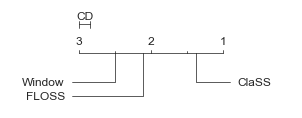

In [61]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4, filename=f"../../figures/cd_comparative_archives.pdf") # 

Let's compute wins/losses against ClaSP.

In [13]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs FLOSS: (wins/ties/losses): 399/2/84
ClaSS vs Window: (wins/ties/losses): 386/3/96


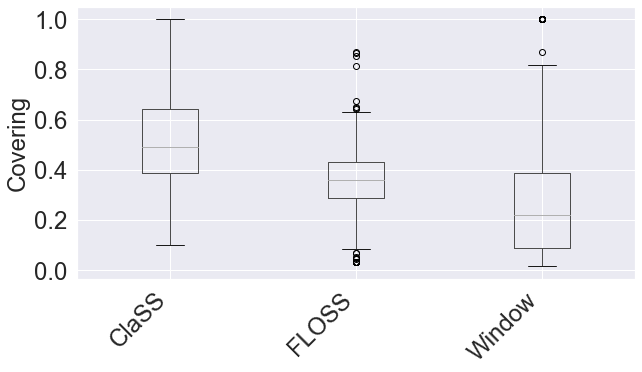

In [14]:
fontsize = 24
_, ax = plt.subplots(figsize=(10,5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0+.2,.2),1))
    
plt.savefig(f"../../figures/bp_comparative_archives.pdf", bbox_inches="tight") 

In [15]:
df_scores.shape

(485, 4)